In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vuppa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

In [6]:
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [9]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [12]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)


In [15]:
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[55 42]
 [12 91]]


In [16]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
score1 = accuracy_score(y_test,y_pred) 
score2 = precision_score(y_test,y_pred) 
score3 = recall_score(y_test,y_pred) 
print("\n")
print("Accuracy is ", round(score1*100,2), "%")
print("Precision is", round(score2, 2))




Accuracy is  73.0 %
Precision is 0.68


In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.8) 
classifier.fit(X_train, y_train)

BernoulliNB(alpha=0.8)

In [19]:
 from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[55 42]
 [12 91]]


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred) 
score2 = precision_score(y_test,y_pred) 
score3= recall_score(y_test,y_pred) 
print("\n")
print("Accuracy is ", round(score1*100,2),"%") 
print("Precision is ", round(score2,2))
print("Recall is ", round(score3,2))




Accuracy is  73.0 %
Precision is  0.68
Recall is  0.88


In [21]:
from sklearn.metrics import f1_score, classification_report

# Get classification report
print(classification_report(y_test, y_pred))

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {round(f1, 2)}")


              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200

F1 Score: 0.77


In [22]:
X_pred = np.array(['It was nice visiting the restaurant.'])
X_pred = cv.transform(X_pred).toarray() 
classifier.predict(X_pred)

array([1], dtype=int64)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5],
    'binarize': [0.0, 0.1, 0.2]
}

# Initialize the model
classifier = BernoulliNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")


Best Parameters: {'alpha': 1.5, 'binarize': 0.0}
Best Accuracy: 0.76


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace CountVectorizer with TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1500)
X = tfidf.fit_transform(corpus).toarray()

# The rest of the model training code remains the same.


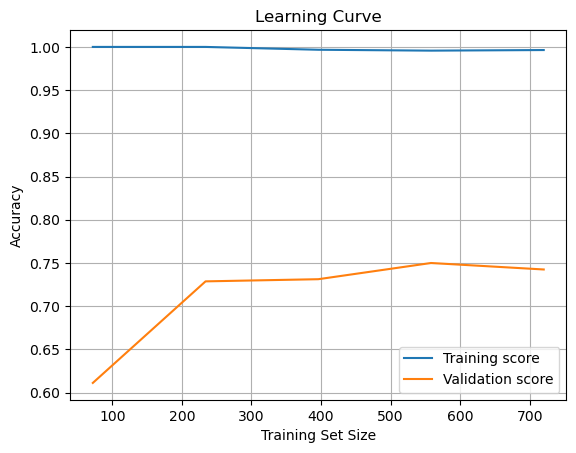

In [25]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier  # or any other classifier
import matplotlib.pyplot as plt

# Example of defining the classifier
classifier_best = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your training data (optional, depending on your use case)
# classifier_best.fit(X_train, y_train)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(classifier_best, X_train, y_train, cv=10, n_jobs=-1)

# Calculate mean scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()
